In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
car_dataset = pd.read_csv('car_data.csv')

In [3]:
car_dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_dataset.shape

(301, 9)

In [6]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# check the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [10]:
# Data Encoding - Change the data type from Object to numerical
# Fuel Type --> Petrol - 0, Diesel - 1, CNG - 2
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# Seller --> Dealer - 0, Individual - 1
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# Transmission --> Manual - 0, Automatic - 1
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2032\2543195852.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2032\2543195852.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2032\2543195852.py:9: FutureWarning: Downcasting behavior in `

In [11]:
# check the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
0    239
1     60
2      2
Name: count, dtype: int64
Seller_Type
0    195
1    106
Name: count, dtype: int64
Transmission
0    261
1     40
Name: count, dtype: int64


In [12]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Splitting the data and Target

In [13]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [14]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [15]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# Splitting Training and Test Data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [17]:
X_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
204,2015,4.430,28282,0,0,0,0
249,2016,7.600,17000,0,0,0,0
277,2015,13.600,21780,0,0,0,0
194,2008,0.787,50000,0,1,0,0
244,2013,9.400,49000,1,0,0,0
...,...,...,...,...,...,...,...
75,2015,6.800,36000,0,0,0,0
22,2011,8.010,50000,0,0,1,0
72,2013,18.610,56001,0,0,0,0
15,2016,10.790,43000,1,0,0,0


# Train the Model

# Linear Regeression Model

In [18]:
lin_reg_model = LinearRegression()

**Prediction on Training Data**

In [19]:
lin_reg_model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Model Evaluation**

In [20]:
# prediction on training data
tr_data_prediction = lin_reg_model.predict(X_train)

In [21]:
# R squared error
error_score = metrics.r2_score(Y_train,tr_data_prediction)

In [22]:
error_score

0.8799451660493708

**Visualize the actual and predicted prizes**

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

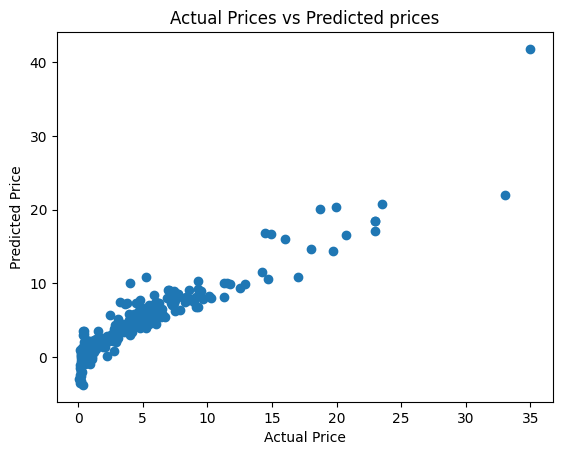

In [23]:
plt.scatter(Y_train,tr_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted prices")

**Prediction on Test Data**

In [24]:
test_data_prediction = lin_reg_model.predict(X_test)

In [25]:
# R squared error
error_score_test = metrics.r2_score(Y_test,test_data_prediction)
error_score_test

0.8365766715026374

**Visualize the actual and predicted price for test data**

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

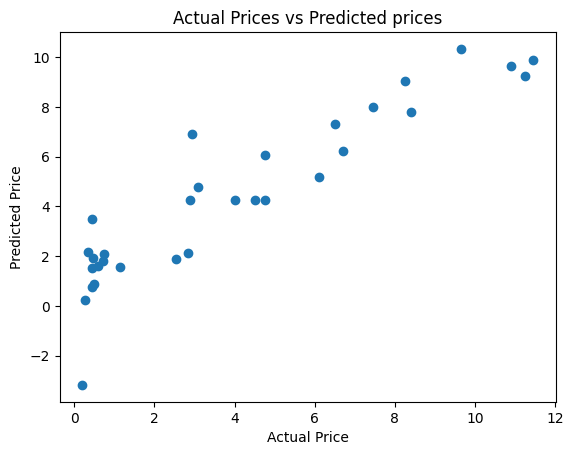

In [26]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted prices")

# Lasso Regression Model

In [27]:
lasso_reg_model = Lasso()

In [28]:
lasso_reg_model.fit(X_train,Y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


**Model Evaluation**

In [29]:
# prediction on training data
lasso_tr_data_prediction = lasso_reg_model.predict(X_train)

In [30]:
# R squared error
lasso_error_score = metrics.r2_score(Y_train,lasso_tr_data_prediction)

In [31]:
lasso_error_score

0.8427856123435794

**Visualize the actual and predicted prizes**

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

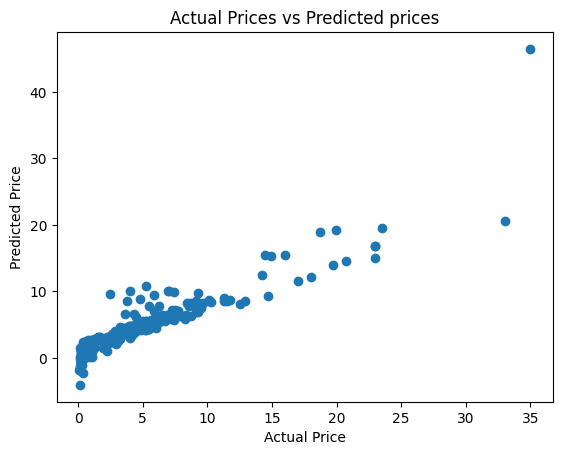

In [32]:
plt.scatter(Y_train,lasso_tr_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted prices")

**Prediction on Test Data**

In [34]:
lasso_test_data_prediction = lasso_reg_model.predict(X_test)

In [35]:
# R squared error
lasso_error_score_test = metrics.r2_score(Y_test,lasso_test_data_prediction)
lasso_error_score_test

0.8709167941173195

**Visualize the actual and predicted price for test data**

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

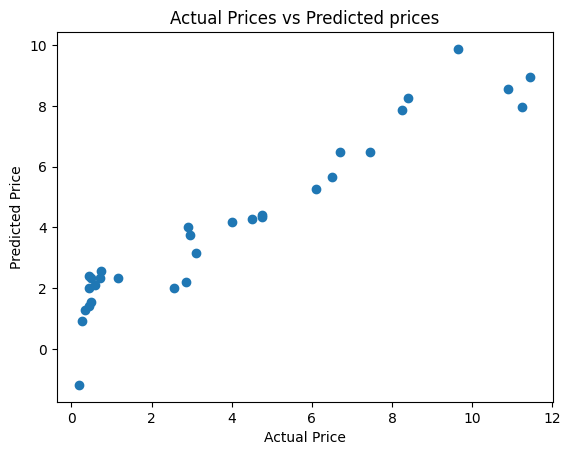

In [36]:
plt.scatter(Y_test,lasso_test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted prices")